In [1]:
#M02-T01: Visualització gràfica d'un dataset

In [2]:
#Importar módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importamos archivo csv a una dataframe
df= pd.read_csv('DelayedFlights.csv', index_col=0)

In [4]:
#Quitamos filas duplicadas
temp_df= df.append(df) 
temp_df=temp_df.drop_duplicates().reset_index() 

#Escogemos columnas relevantes
df_new= temp_df[['Month','UniqueCarrier','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','Cancelled','Diverted']]

#Eliminamos vuelos cancelados o desviados:
Canc_dev_idx=df_new[(df_new['Cancelled']==1) | (df_new['Diverted']==1)].index 
df_new2=df_new.drop(Canc_dev_idx).reset_index() 

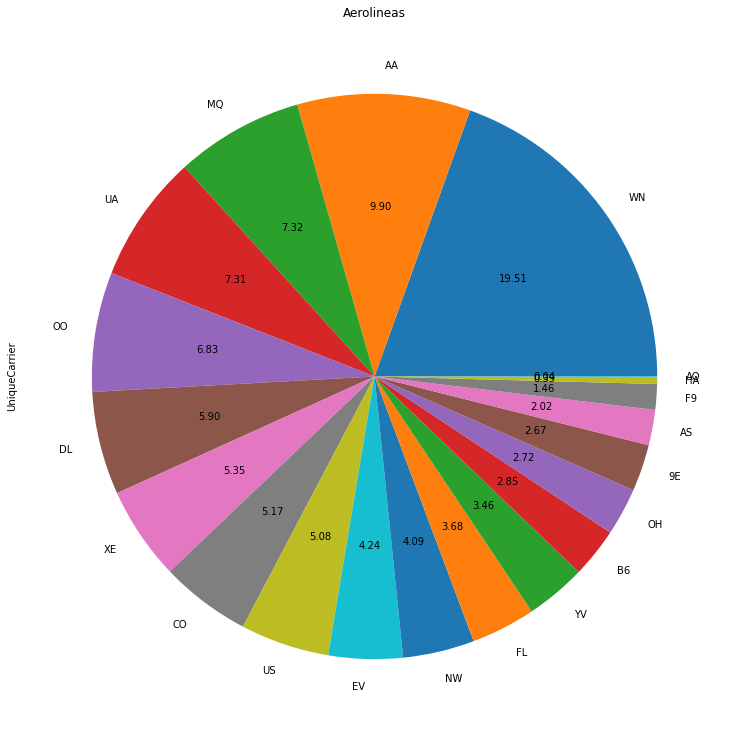

In [6]:
#Variable categórica: UniqueCarrier
#Pie Chart

plot= df_new2['UniqueCarrier'].value_counts().plot(kind='pie',autopct='%.2f' ,
                                            figsize=(13, 13),
                                            title='Aerolineas')
#Casi el 20% de los vuelos los operó WN.

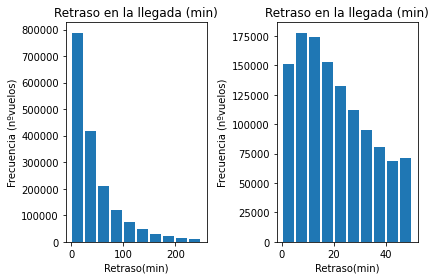

In [16]:
#Variable numèrica: ArrDelay
#Histograma

#Para saber que rango de datos escoger para el eje x del histograma calculamos el percentil 99=256.
np.percentile(df_new2['ArrDelay'],99)
#El rango sera de 0 - 256 min, porque la gran mayoria de retrasos serán menores de 250 minutos 

#La mayoria de retrasos que se producen son de 0-50 min.
plt.subplot(1, 2, 1) #pondremos 2 graficos juntos
plt.hist(df_new2['ArrDelay'],range=(0,250),rwidth=0.85) #calculamos el histograma de ArrDelay con el rango 0-250, y con un espacio entre columnas
plt.title('Retraso en la llegada (min)') #Titulo
plt.xlabel('Retraso(min)') #Leyenda eje X
plt.ylabel('Frecuencia (nºvuelos)') #Leyenda eje y

#Hacemos otros histograma que nos detalle la frecuencia de retrasos de 0-50 min.
plt.subplot(1, 2, 2)
plt.hist(df_new2['ArrDelay'],range=(0,50),rwidth=0.85) #Rango más pequeño
plt.title('Retraso en la llegada (min)')
plt.xlabel('Retraso(min)')
plt.ylabel('Frecuencia (nºvuelos)')

plt.tight_layout() #Para que no haya superposición entre los dos gráficos
plt.show()  #Mostrar gráficos.

#La mayoria de retrasos que se producen son entre 5-10 minutos.

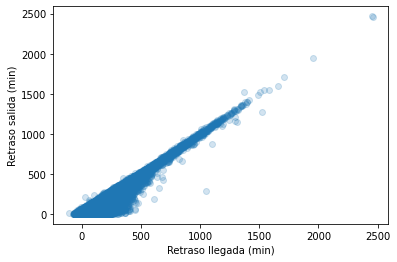

0.9529266855767893


In [27]:
#Dues variables numèriques (ArrDelay i DepDelay
#Scatter plot: para ver si hay alguna relación entre el tiempo de vuelo y los retrasos.

x=df_new2['ArrDelay']
y=df_new2['DepDelay']

plt.scatter(x,y,alpha=0.2)
plt.xlabel('Retraso llegada (min)')
plt.ylabel('Retraso salida (min)')

plt.show()

#El diagrama de dispersión parece indicar una relación linear positiva entre ambas variables.

print(df_new2['ArrDelay'].corr(df_new2['DepDelay']))

#El coeficiente de correlacion es similar a 1, por lo que ambas variables tiene una correlación positiva casi perfecta.


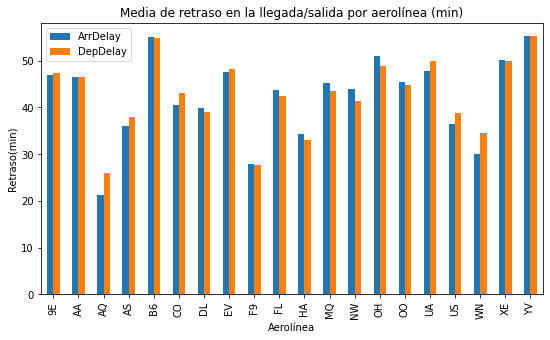

In [42]:
#Tres variables (ArrDelay, DepDelay i UniqueCarrier)

#Hacemos una pivot table para mirar el tiempo medio de retraso de llegada, salida y de vuelo por carrier
df_pivot= df_new2.pivot_table(index='UniqueCarrier',values=['ArrDelay','DepDelay','AirTime'],
                              aggfunc={'ArrDelay':np.mean,'DepDelay':np.mean,'AirTime':np.mean}).reset_index()

#Generamos un grafico de barras
df_pivot.plot(x='UniqueCarrier',y=['ArrDelay','DepDelay'],kind='bar',figsize=(9,5))

plt.title('Media de retraso en la llegada/salida por aerolínea (min)')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso(min)')

plt.show()

#No hay grandes diferencias entre los retrasos de salida y llegada por aerolínea.
#Las aerolíneas con mas retrasos medios de llegada y salida son B6 y YV.
#Necesitaríamos saber el tiempo medio de vuelo para saber si esta relacionado con el tiempo de retraso.

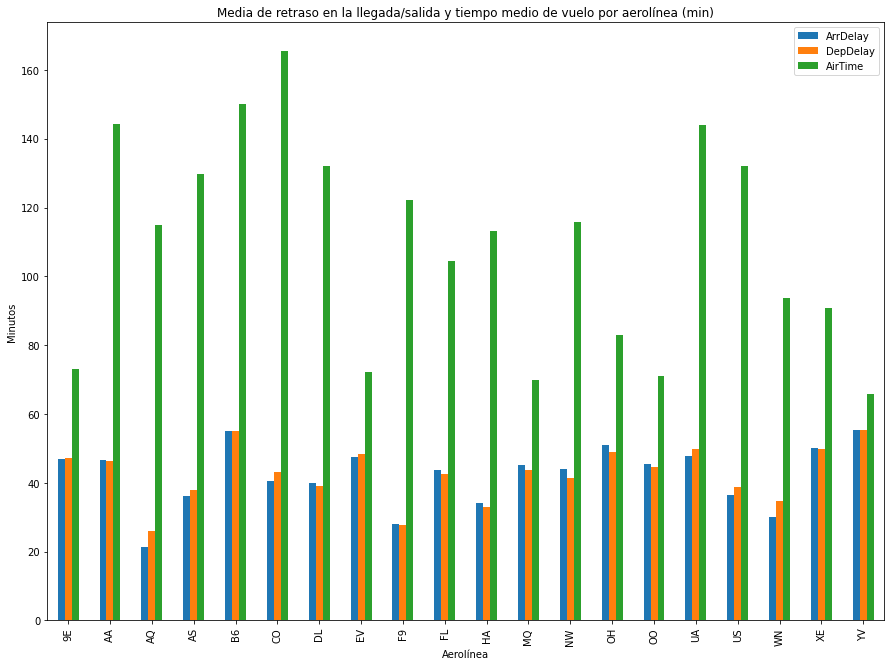

In [45]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

#Generamos el gráfico de barras incluyendo el tiempo medio de vuelo
df_pivot.plot(x='UniqueCarrier',y=['ArrDelay','DepDelay','AirTime'],kind='bar',figsize=(15,11))

plt.title('Media de retraso en la llegada/salida y tiempo medio de vuelo por aerolínea (min)')
plt.xlabel('Aerolínea')
plt.ylabel('Minutos')

plt.show()

#YV es una aerolínea cuyos tiempos medios de retraso son ligeramente menores que el tiempo de vuelo, lo que significa 
#que un viajero de media está casi tanto tiempo en el aire como esperando.

#Además en el ejercicio anterior vimos que el 74% de sus vuelos llegan con retraso.